## Passo 1: Carregar e Examinar o Dataset

Primeiro, vamos carregar os dados e dar uma olhada nas primeiras linhas para entender a estrutura do dataset.

- target = evento de destino de compra (0 não 1 sim).

In [3]:
import pandas as pd

# Carregar os dados
data = pd.read_csv('data/product.csv')

# Mostrar as primeiras linhas do dataset
print(data.head())


                           order_id                           user_id  \
0  cfcd208495d565ef66e7dff9f98764da  c81e728d9d4c2f636f067f89cc14862c   
1  c4ca4238a0b923820dcc509a6f75849b  eccbc87e4b5ce2fe28308fd9f2a7baf3   
2  c81e728d9d4c2f636f067f89cc14862c  eccbc87e4b5ce2fe28308fd9f2a7baf3   
3  eccbc87e4b5ce2fe28308fd9f2a7baf3  eccbc87e4b5ce2fe28308fd9f2a7baf3   
4  a87ff679a2f3e71d9181a67b7542122c  eccbc87e4b5ce2fe28308fd9f2a7baf3   

                            page_id           product site_version  \
0  6f4922f45568161a8cdf4ad2299f6d23          sneakers      desktop   
1  4e732ced3463d06de0ca9a15b6153677          sneakers      desktop   
2  5c45a86277b8bf17bff6011be5cfb1b9  sports_nutrition      desktop   
3  fb339ad311d50a229e497085aad219c7           company      desktop   
4  fb339ad311d50a229e497085aad219c7           company      desktop   

                  time         title  target  
0  2019-01-11 09:24:43  banner_click       0  
1  2019-01-09 09:38:51   banner_show       0  

## Passo 2: Limpeza de Dados

Identificar e tratar valores nulos ou inconsistentes, se houver.

In [4]:
# Verificar valores nulos
print(data.isnull().sum())

# Tratar valores nulos (se necessário)
data = data.dropna()  # ou data.fillna(valor)

order_id        0
user_id         0
page_id         0
product         0
site_version    0
time            0
title           0
target          0
dtype: int64


## Passo 3: Análise Exploratória
### 3.1 Análise Univariada
Vamos analisar variáveis individuais para entender melhor sua distribuição e características.

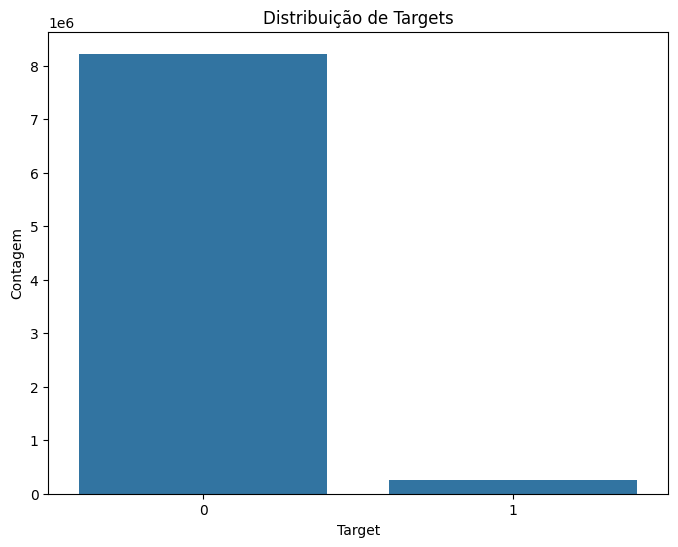

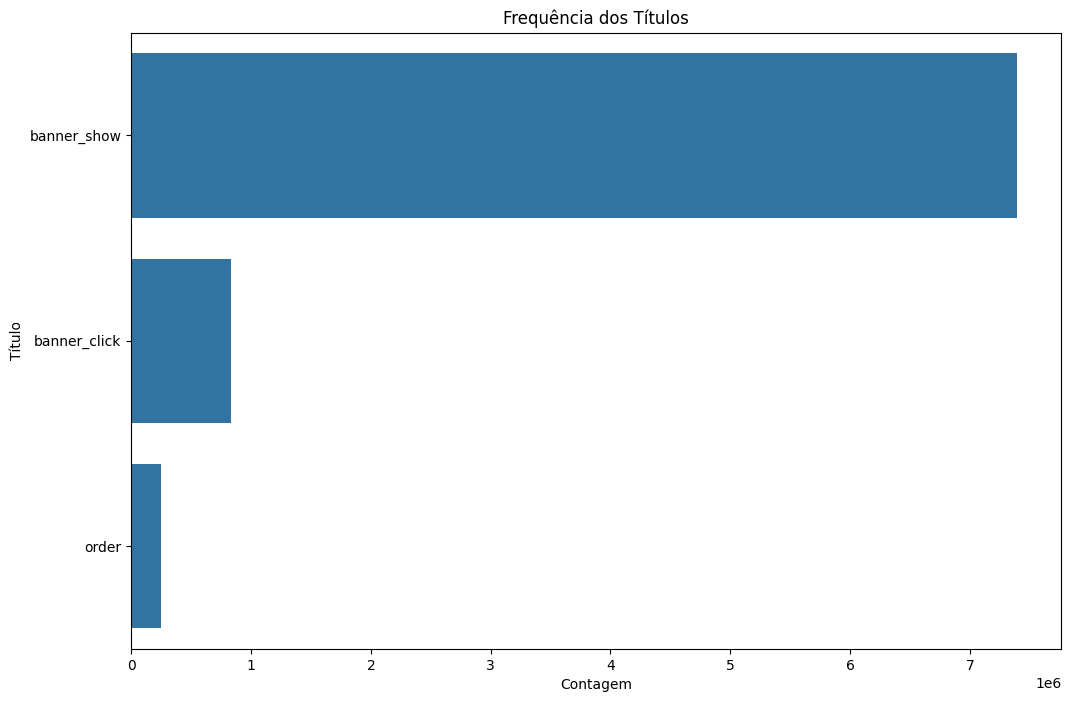

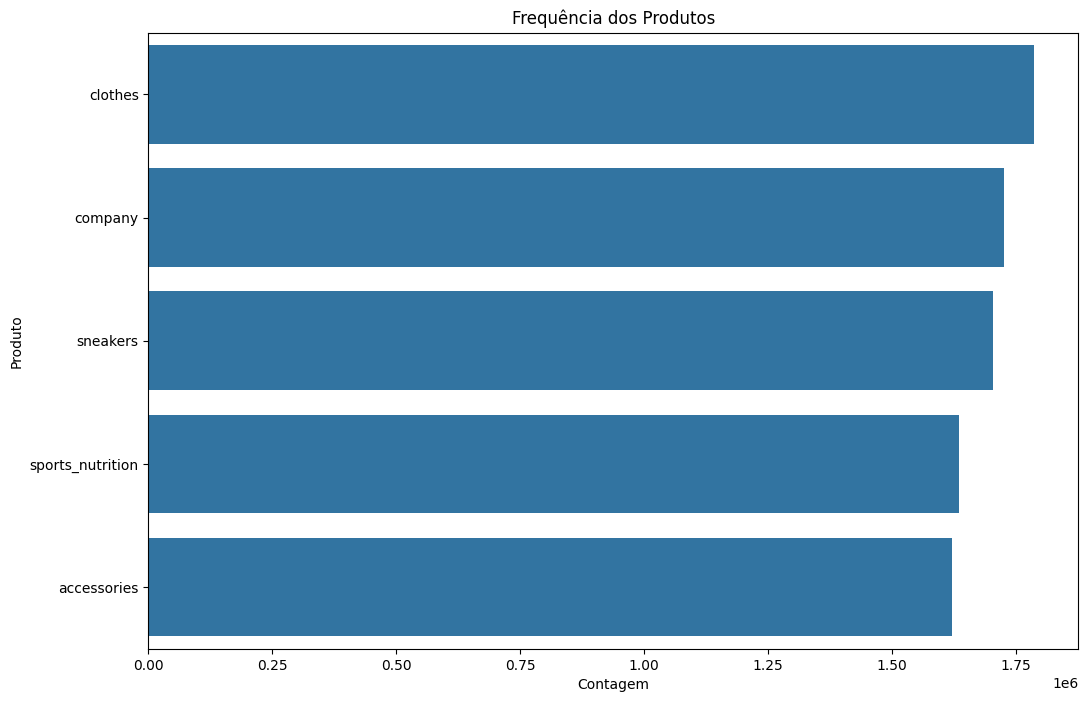

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição de targets (compras)
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Distribuição de Targets')
plt.xlabel('Target')
plt.ylabel('Contagem')
plt.show()

# Frequência de títulos
plt.figure(figsize=(12, 8))
sns.countplot(y='title', data=data, order=data['title'].value_counts().index)
plt.title('Frequência dos Títulos')
plt.xlabel('Contagem')
plt.ylabel('Título')
plt.show()

# Frequência de produtos
plt.figure(figsize=(12, 8))
sns.countplot(y='product', data=data, order=data['product'].value_counts().index)
plt.title('Frequência dos Produtos')
plt.xlabel('Contagem')
plt.ylabel('Produto')
plt.show()


### 3.2 Análise Bivariada
Explorar as relações entre duas variáveis para obter insights mais detalhados.

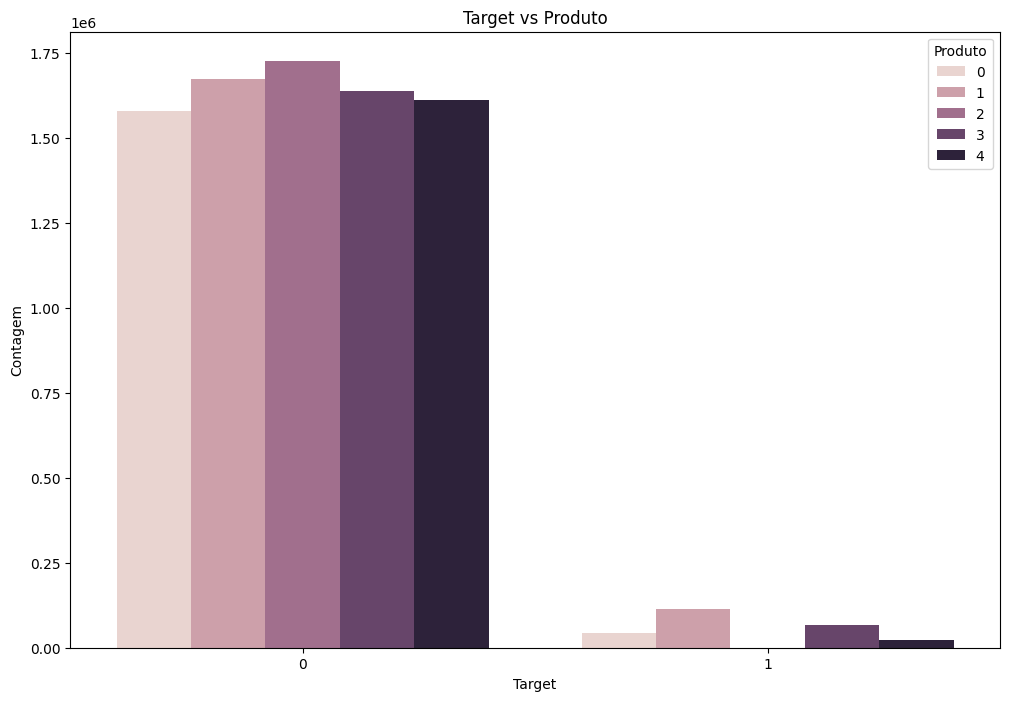

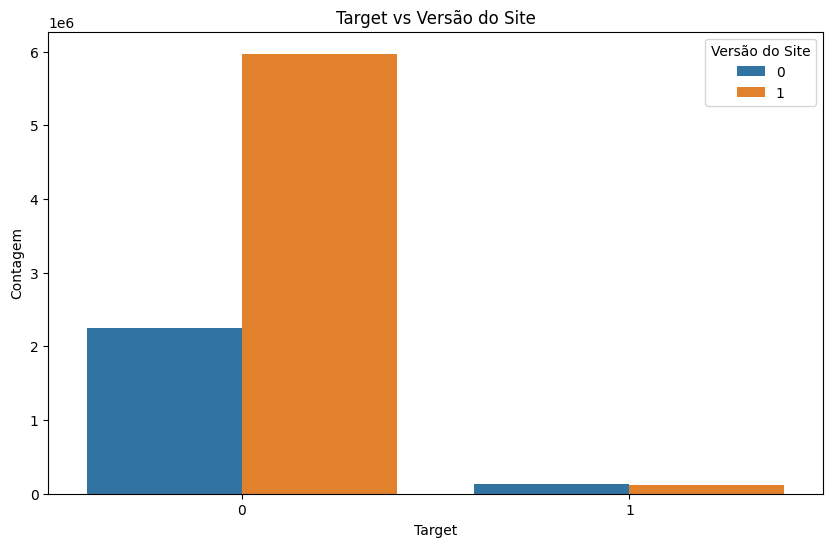

In [11]:
# Target vs Produto
plt.figure(figsize=(12, 8))
sns.countplot(x='target', hue='product', data=data)
plt.title('Target vs Produto')
plt.xlabel('Target')
plt.ylabel('Contagem')
plt.legend(title='Produto')
plt.show()

# Target vs Site Version
plt.figure(figsize=(10, 6))
sns.countplot(x='target', hue='site_version', data=data)
plt.title('Target vs Versão do Site')
plt.xlabel('Target')
plt.ylabel('Contagem')
plt.legend(title='Versão do Site')
plt.show()


## Passo 4: Definir Regras de Negócio
Com base na análise exploratória, podemos criar algumas regras de negócio, como:

- Promoções direcionadas: Oferecer promoções para produtos com menor taxa de conversão.
- Otimização de banners: Focar em banners que têm maior probabilidade de conversão.
- Segmentação por plataforma: Adaptar estratégias de marketing para desktop e mobile com base no comportamento dos usuários.

## Passo 5: Modelo de Machine Learning
Podemos criar um modelo para prever se um cliente realizará uma compra (target).

### 5.1 Preparação dos Dados
Selecionar características relevantes e preparar os dados para o modelo

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codificar variáveis categóricas
label_encoder = LabelEncoder()
data['product'] = label_encoder.fit_transform(data['product'])
data['site_version'] = label_encoder.fit_transform(data['site_version'])
data['title'] = label_encoder.fit_transform(data['title'])

# Selecionar variáveis preditoras e alvo
X = data[['product', 'site_version', 'title']]
y = data['target']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 5.2 Treinamento e Avaliação do Modelo
Vamos usar um modelo de Random Forest para a tarefa de classificação.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


# TESTE

In [27]:
# Converter a coluna 'time' para datetime
data['time'] = pd.to_datetime(data['time'])

# Extrair características temporais
data['hour'] = data['time'].dt.hour
data['day_of_week'] = data['time'].dt.dayofweek
data['month'] = data['time'].dt.month


In [28]:
product_conversion = data.groupby('product')['target'].mean().sort_values()
print(product_conversion)


product
2    0.000000
4    0.014521
0    0.027471
3    0.039757
1    0.063095
Name: target, dtype: float64


In [29]:
banner_conversion = data.groupby('title')['target'].mean().sort_values()
print(banner_conversion)


title
0    0.0
1    0.0
2    1.0
Name: target, dtype: float64


In [30]:
platform_conversion = data.groupby('site_version')['target'].mean()
print(platform_conversion)


site_version
0    0.055891
1    0.018977
Name: target, dtype: float64


In [32]:
# Codificar variáveis categóricas
data['product'] = label_encoder.fit_transform(data['product'])
data['site_version'] = label_encoder.fit_transform(data['site_version'])
data['title'] = label_encoder.fit_transform(data['title'])

# Selecionar variáveis preditoras e alvo
X = data[['product', 'site_version', 'title', 'hour', 'day_of_week', 'month']]
y = data['target']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
data_sampled = data.sample(frac=0.1, random_state=42)  # Amostra 10% dos dados

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Testar diferentes modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Modelo: {name}")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
    print("\n")


Modelo: Random Forest
Acurácia: 1.0
Matriz de Confusão:
 [[1644333       0]
 [      0   49911]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1644333
           1       1.00      1.00      1.00     49911

    accuracy                           1.00   1694244
   macro avg       1.00      1.00      1.00   1694244
weighted avg       1.00      1.00      1.00   1694244



Modelo: Gradient Boosting
Acurácia: 1.0
Matriz de Confusão:
 [[1644333       0]
 [      0   49911]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1644333
           1       1.00      1.00      1.00     49911

    accuracy                           1.00   1694244
   macro avg       1.00      1.00      1.00   1694244
weighted avg       1.00      1.00      1.00   1694244



Modelo: Logistic Regression
Acurácia: 1.0
Matriz de Confusão:
 [[1644333       0]
 [    

In [39]:
low_conversion_products = product_conversion[product_conversion < 0.8].index  # Defina um threshold apropriado
print("Produtos com baixa conversão:", low_conversion_products)


Produtos com baixa conversão: Index([2, 4, 0, 3, 1], dtype='int64', name='product')


In [43]:
high_conversion_banners = banner_conversion[banner_conversion > 0.9].index  # Defina um threshold apropriado
print("Banners com alta conversão:", high_conversion_banners)


Banners com alta conversão: Index([2], dtype='int64', name='title')


In [44]:
print("Conversão por plataforma:", platform_conversion)


Conversão por plataforma: site_version
0    0.055891
1    0.018977
Name: target, dtype: float64


In [ ]:
from sklearn.model_selection import GridSearchCV

# Exemplo com Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)
